# Resale HDB Apartments Pricing Analysis

# Executive Summary

Based on the comprehensive analysis of the factors affecting resale prices in the housing market, it is evident that certain key variables play a significant role in determining the value of a property. The top 10 factors identified include floor area (sqm), highest floor level in the entire flat, number of rooms, upper floor levels, mid floor levels, year completed, lower floor levels, lease commence date, and HDB age. Among these factors, the number of room units, HDB age, and floor area exhibit the highest correlation with resale prices.

The correlation heatmap further illustrates the relationship between these factors and resale prices. It indicates that properties with a larger floor area, higher maximum floor level, and a greater number of room units tend to command higher resale prices. Conversely, flats located in buildings with more 3-room units and higher HDB age are associated with lower resale prices.

These findings provide valuable insights for stakeholders in the housing market, including buyers, sellers, and policymakers. Understanding the factors that influence resale prices can inform strategic decision-making and help optimize investments in real estate. Moving forward, continued research and analysis in this area will be essential for navigating the dynamic landscape of the housing market and promoting sustainable growth and development.

# Problem Statement

Real estate agencies are facing difficulties in providing HDB resellers with accurate market price quotes close to the HDB valuation. Our objective is to develop an analysis using historical data: Singapore Housing Dataset, to find variables affecting resale prices. This is to aid in more adiscovering factors that affects chages in the price of HDB apartment during the resale process to better provide a quote with a reasonable error margin to offer clients.

# Import libraries & dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Datasets

Resale HDB Flat Prices 2012 - 2023 [Source](https://www.kaggle.com/datasets/syrahmadi/resale-hdb-flat-prices-2000-2022)

In [ ]:
hdb = pd.read_csv('../data/hdb.csv')

# Data Dictionary

|Feature|Type|Description|
|---|---|---|
|**id**|*integer*|unique id for each transaction|
|**town**|*string*|HDB township where the flat is located, e.g. BUKIT MERAH|
|**flat_type**|*string*|type of the resale flat unit, e.g. 3 ROOM|
|**block**|*string*|block number of the resale flat, e.g. 454|
|**street_name**|*string*|street name where the resale flat resides, e.g. TAMPINES ST 42|
|**storey_range**|*string*|floor level (range) of the resale flat unit, e.g. 07 TO 09|
|**floor_area_sqm**|*float*|floor area of the resale flat unit in square metres|
|**flat_model**|*string*|HDB model of the resale flat, e.g. Multi Generation|
|**lease_commence_date**|*integer*|commencement year of the flat unit's 99-year lease|
|**resale_price**|*float*|the property's sale price in Singapore dollars|
|**tranc_year**|*integer*|year of resale transaction|
|**tranc_month**|*integer*|month of resale transaction|
|**mid_storey**|*integer*|median value of storey_range|
|**lower**|*integer*|lower value of storey_range|
|**upper**|*integer*|upper value of storey_range|
|**mid**|*integer*|middle value of storey_range|
|**full_flat_type**|*string*|combination of flat_type and flat_model|
|**address**|*string*|combination of block and street_name|
|**floor_area_sqft**|*float*|floor area of the resale flat unit in square feet|
|**price_per_sqft**|*float*|the property's price per square feet in Singapore dollars|
|**hdb_age**|*integer*|number of years from lease_commence_date to present year|
|**max_floor_lvl**|*integer*|highest floor of the resale flat|
|**year_completed**|*integer*|year which construction was completed for resale flat|
|**residential**|*string*|boolean value if resale flat has residential units in the same block|
|**commercial**|*string*|boolean value if resale flat has commercial units in the same block|
|**market_hawker**|*string*|boolean value if resale flat has a market or hawker centre in the same block|
|**multistorey_carpark**|*string*|boolean value if resale flat has a multistorey carpark in the same block|
|**precinct_pavilion**|*string*|boolean value if resale flat has a pavilion in the same block|
|**total_dwelling_units**|*integer*|total number of residential dwelling units in the resale flat|
|**1room_sold**|*integer*|number of 1-room residential units in the resale flat|
|**2room_sold**|*integer*|number of 2-room residential units in the resale flat|
|**3room_sold**|*integer*|number of 3-room residential units in the resale flat|
|**4room_sold**|*integer*|number of 4-room residential units in the resale flat|
|**5room_sold**|*integer*|number of 5-room residential units in the resale flat|
|**exec_sold**|*integer*|number of executive type residential units in the resale flat block|
|**multigen_sold**|*integer*|number of multi-generational type residential units in the resale flat block|
|**studio_apartment_sold**|*integer*|number of studio apartment type residential units in the resale flat block|
|**1room_rental**|*integer*|number of 1-room rental residential units in the resale flat block|
|**2room_rental**|*integer*|number of 2-room rental residential units in the resale flat block|
|**3room_rental**|*integer*|number of 3-room rental residential units in the resale flat block|
|**other_room_rental**|*integer*|number of "other" type rental residential units in the resale flat block|
|**postal**|*string*|postal code of the resale flat block|
|**latitude**|*float*|Latitude based on postal code|
|**longitude**|*float*|Longitude based on postal code|
|**planning_area**|*string*|Government planning area that the flat is located|
|**mall_nearest_distance**|*float*|distance (in metres) to the nearest mall|
|**mall_within_500m**|*float*|number of malls within 500 metres|
|**mall_within_1km**|*float*|number of malls within 1 kilometre|
|**mall_within_2km**|*float*|number of malls within 2 kilometre|
|**hawker_nearest_distance**|*float*|distance (in metres) to the nearest hawker centre|
|**hawker_within_500m**|*float*|number of hawker centres within 500 metres|
|**hawker_within_1km**|*float*|number of hawker centres within 1 kilometre|
|**hawker_within_2km**|*float*|number of hawker centres within 2 kilometre|
|**hawker_food_stalls**|*integer*|number of hawker food stalls in the nearest hawker centre|
|**hawker_market_stalls**|*integer*|number of hawker and market stalls in the nearest hawker centre|
|**mrt_nearest_distance**|*float*|distance (in metres) to the nearest MRT station|
|**mrt_name**|*string*|name of the nearest MRT station|
|**bus_interchange**|*integer*|boolean value if the nearest MRT station is also a bus interchange|
|**mrt_interchange**|*integer*|boolean value if the nearest MRT station is a train interchange station|
|**mrt_latitude**|*float*|latitude (in decimal degrees) of the the nearest MRT station|
|**mrt_longitude**|*float*|longitude (in decimal degrees) of the nearest MRT station|
|**bus_stop_nearest_distance**|*float*|distance (in metres) to the nearest bus stop|
|**bus_stop_name**|*string*|name of the nearest bus stop|
|**bus_stop_latitude**|*float*|latitude (in decimal degrees) of the the nearest bus stop|
|**bus_stop_longitude**|*float*|longitude (in decimal degrees) of the nearest bus stop|
|**pri_sch_nearest_distance**|*float*|distance (in metres) to the nearest primary school|
|**pri_sch_name**|*string*|name of the nearest primary school|
|**vacancy**|*integer*|number of vacancies in the nearest primary school|
|**pri_sch_affiliation**|*integer*|boolean value if the nearest primary school has a secondary school affiliation|
|**pri_sch_latitude**|*float*|latitude (in decimal degrees) of the the nearest primary school|
|**pri_sch_longitude**|*float*|longitude (in decimal degrees) of the nearest primary school|
|**sec_sch_nearest_dist**|*float*|distance (in metres) to the nearest secondary school|
|**sec_sch_name**|*string*|name of the nearest secondary school|
|**cutoff_point**|*integer*|PSLE cutoff point of the nearest secondary school|
|**affiliation**|*integer*|boolean value if the nearest secondary school has an primary school affiliation|
|**sec_sch_latitude**|*float*|latitude (in decimal degrees) of the the nearest secondary school|
|**sec_sch_longitude**|*float*|longitude (in decimal degrees) of the nearest secondary school|

# Data Cleaning

Summary Statistics

In [3]:
pd.set_option('display.max_columns', None)
hdb.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634.00000,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,149805.000000,57845.000000,125208.000000,148694.000000,150634.000000,53244.000000,89766.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000
mean,93047.887496,97.19763,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,1046.235290,28.551536,15.139816,1990.922906,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,1.366224,103.839391,664.239826,1.269237,2.149623,5.236486,1173.700148,1.382672,2.358766,4.704122,48.65298,58.138322,765.007872,0.546364,0.264024,1.365667,103.839400,115.258966,1.366231,103.839369,395.172974,55.368190,0.113195,1.366268,103.839106,508.533220,210.146428,0.031879,1.365986,103.839340
std,53679.906247,24.40304,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,262.674321,12.138829,6.232492,12.202185,58.349670,5.947970,11.713826,68.748273,45.302101,33.456575,19.131872,1.135483,5.350617,2.028341,11.193820,0.669842,0.024305,0.042850,0.072506,368.739209,0.624275,1.287372,3.453332,1076.701337,0.652205,1.630609,3.955697,19.13878,55.495519,429.366039,0.497847,0.440814,0.042563,0.072582,55.572855,0.042865,0.072520,234.760931,17.903918,0.316832,0.042669,0.072637,309.066265,20.010489,0.175677,0.042599,0.072630
min,1.000000,31.00000,1966.000000,1.500000e+05,2012.000000,1.000000,2.000000,1.000000,3.000000,2.000000,333.684000,2.000000,2.000000,1949.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.270380,103.685228,0.000000,1.000000,1.000000,1.000000,1.873295,1.000000,1.000000,1.000000,0.00000,0.000000,21.971410,0.000000,0.000000,1.265982,103.697143,9.001285,1.270759,103.684206,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207
25%,46469.250000,75.00000,1984.000000,3.470000e+05,2014.000000,4.000000,5.000000,4.000000,6.000000,5.000000,807.300000,20.000000,12.000000,1983.000000,90.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.336285,103.774859,391.473823,1.000000,1.000000,3.000000,372.132398,1.000000,1.000000,1.000000,40.00000,0.000000,458.266301,0.000000,0.000000,1.336358,103.773982,75.032491,1.336405,103.774414,227.083163,44.000000,0.000000,1.337289,103.773754,290.285883,188.000000,0.000000,1.337545,103.776008
50%,93077.500000,95.00000,1992.000000,4.200000e+05,2017.000000,7.000000,8.000000,7.000000,9.000000,8.000000,1022

In [4]:
print(hdb.shape)
hdb.info()
hdb.head()

(150634, 77)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey      

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


Lowercasing column titles to keep consistency

In [5]:
hdb.columns=hdb.columns.str.lower()
hdb.columns

Index(['id', 'tranc_yearmonth', 'town', 'flat_type', 'block', 'street_name',
       'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'resale_price', 'tranc_year', 'tranc_month', 'mid_storey', 'lower',
       'upper', 'mid', 'full_flat_type', 'address', 'floor_area_sqft',
       'hdb_age', 'max_floor_lvl', 'year_completed', 'residential',
       'commercial', 'market_hawker', 'multistorey_carpark',
       'precinct_pavilion', 'total_dwelling_units', '1room_sold', '2room_sold',
       '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold',
       'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental',
       'other_room_rental', 'postal', 'latitude', 'longitude', 'planning_area',
       'mall_nearest_distance', 'mall_within_500m', 'mall_within_1km',
       'mall_within_2km', 'hawker_nearest_distance', 'hawker_within_500m',
       'hawker_within_1km', 'hawker_within_2km', 'hawker_food_stalls',
       'hawker_market_stalls', 'mr

Check for null

In [6]:
# Display the count of null values for each column, sorted in descending order
null_counts_sorted = hdb.isnull().sum().sort_values(ascending=False)

# Display the top 10 columns with the highest sum of null values
print(null_counts_sorted.head(10))

hawker_within_500m       97390
mall_within_500m         92789
hawker_within_1km        60868
hawker_within_2km        29202
mall_within_1km          25426
mall_within_2km           1940
mall_nearest_distance      829
mrt_name                     0
mrt_nearest_distance         0
hawker_market_stalls         0
dtype: int64


For 'mall_nearest_distance' there should be a value there but perhaps due to gaps during data collection it was left blank and since the nulls only represent 0.55% if the total dataset, we have decided to drop it.

In [7]:
# Drop the rows with null values in the column "mall_nearest_distance"
hdb.dropna(subset=["mall_nearest_distance"], inplace=True)

# Display the count of null values for each column, sorted in descending order
null_counts_sorted = hdb.isnull().sum().sort_values(ascending=False)

# Display the top 10 columns with the highest sum of null values
print(null_counts_sorted.head(10))

hawker_within_500m      96682
mall_within_500m        91960
hawker_within_1km       60318
hawker_within_2km       28716
mall_within_1km         24597
mall_within_2km          1111
mrt_name                    0
mrt_nearest_distance        0
hawker_market_stalls        0
hawker_food_stalls          0
dtype: int64


For all the mall_within_xxx and hawker_within_xxx columns with nulls, it was left blank presumingly due to there being no mall/hawker within stated distance. Therefore, those will just be replaced with 0.

In [8]:
# Fill rest of null with 0
hdb.fillna(0, inplace=True)

# Display the count of null values for each column, sorted in descending order
null_counts_sorted = hdb.isnull().sum().sort_values(ascending=False)

# Display the top 10 columns with the highest sum of null values
print(null_counts_sorted.head(10))

id                         0
hawker_nearest_distance    0
mrt_name                   0
mrt_nearest_distance       0
hawker_market_stalls       0
hawker_food_stalls         0
hawker_within_2km          0
hawker_within_1km          0
hawker_within_500m         0
mall_within_2km            0
dtype: int64


All other columns can reasonably have duplicates other than 'id'. Therefore, we will be using 'id' to check for potential duplicates

# Check for duplicates under the "id" column
hdb.duplicated(subset=['id']).sum()

Postal column is string therefore could be suspected that there is non-integer present

In [19]:
# List to store column names with non-integer postal values
non_int_postal_columns = []

# Loop through each value in the 'postal' column
for value in hdb['postal']:
    try:
        # Try to convert the value to an integer
        int(value)
    except ValueError:
        # If an error occurs (value is not an integer), add the column name to the list
        non_int_postal_columns.append(value)

# Print the list of columns with non-integer postal values
print("Columns with non-integer postal values:", non_int_postal_columns)

Columns with non-integer postal values: ['NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL', 'NIL']


In [9]:
non_integer_postal_values = hdb[hdb['postal'].str.contains(r'\D', na=False)]
non_integer_postal_values['postal']

880       NIL
3030      NIL
5793      NIL
7849      NIL
9804      NIL
14007     NIL
43215     NIL
48780     NIL
51263     NIL
51951     NIL
52403     NIL
54179     NIL
57224     NIL
61100     NIL
62338     NIL
64384     NIL
66613     NIL
75486     NIL
75494     NIL
76656     NIL
76787     NIL
82841     NIL
87213     NIL
104383    NIL
105835    NIL
107511    NIL
108757    NIL
119777    NIL
126400    NIL
129756    NIL
131736    NIL
132994    NIL
144514    NIL
Name: postal, dtype: object

Drop NIL in postal

In [10]:
non_integer_postal_values_indices = non_integer_postal_values.index
hdb.drop(non_integer_postal_values_indices, inplace=True)

# Exploratory Data Analysis

We will be focusing on analysing distribution and outliers for the resale price column as those outliers have the most impact to in our prediction

Summary statistics of resale price

In [11]:
hdb['resale_price'].describe()

count    1.497720e+05
mean     4.486613e+05
std      1.432260e+05
min      1.500000e+05
25%      3.460000e+05
50%      4.200000e+05
75%      5.200000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

Taking a look of price distribution using a histogram

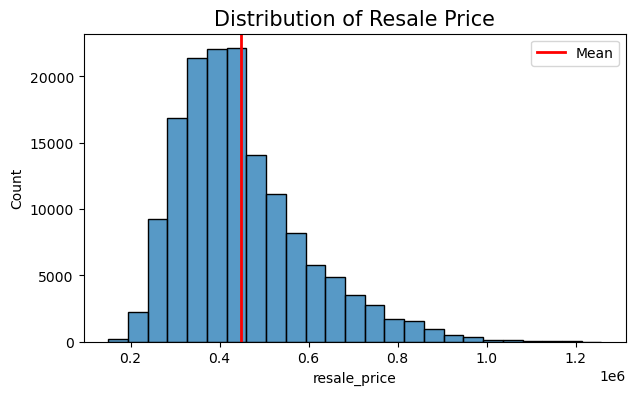

In [12]:
plt.figure(figsize=(7, 4))
sns.histplot(data=hdb, x='resale_price', bins=25)
plt.axvline(hdb['resale_price'].mean(), color='red', linestyle='-', linewidth=2, label='Mean')
plt.title('Distribution of Resale Price', fontsize=15)
plt.legend()
plt.show()

We can see there that resale price ranges from around 200k to 1.26mil. With avarage price of 449k and most of the flats are sold within 800k.

Now we will use a box plot to visualise outliers

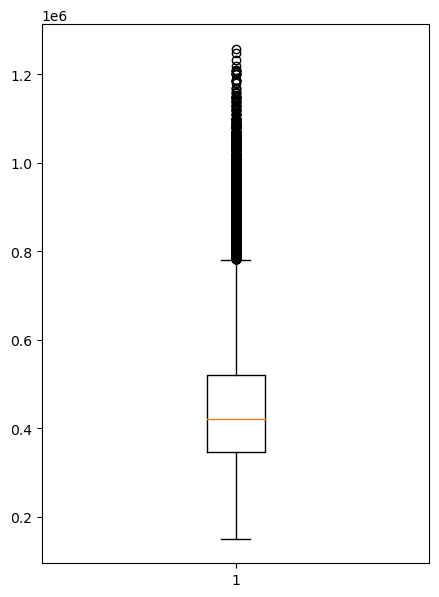

In [13]:
plt.figure(figsize = (5,7))
bp = plt.boxplot(data=hdb, x='resale_price')

Outliers are found in the higher range

Check for the box plot ranges

In [14]:
[item.get_ydata() for item in bp['whiskers']]

[array([346000., 150000.]), array([520000., 781000.])]

Single out the outliers for further analysis

In [15]:
outliers = hdb.loc[hdb['resale_price'] > 779000]
outliers.shape

(5165, 77)

Perhaps floor area and flat type have an effect on the outliers found

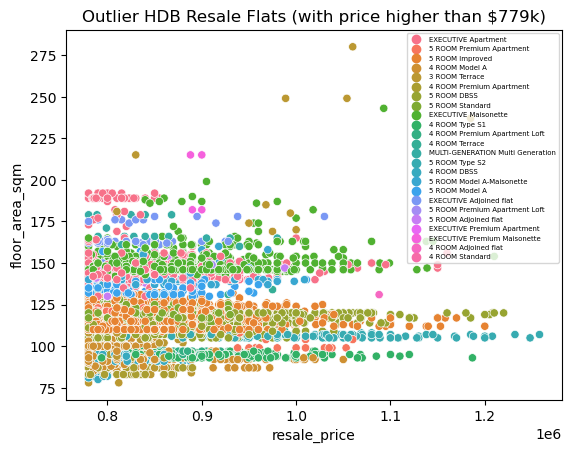

In [16]:
sns.scatterplot(x='resale_price', y='floor_area_sqm', data=outliers, hue='full_flat_type', legend='brief', label=None)
plt.legend(prop={'size': 5})
plt.title('Outlier HDB Resale Flats (with price higher than $779k)');

Since most of the outlier clusters below the 1.25 million mark, it is better to keep these outliers. They are important for capturing the wide variability in our training data, especially when dealing with transactional prices in specific high-value locations.

Trend of resale price over the years

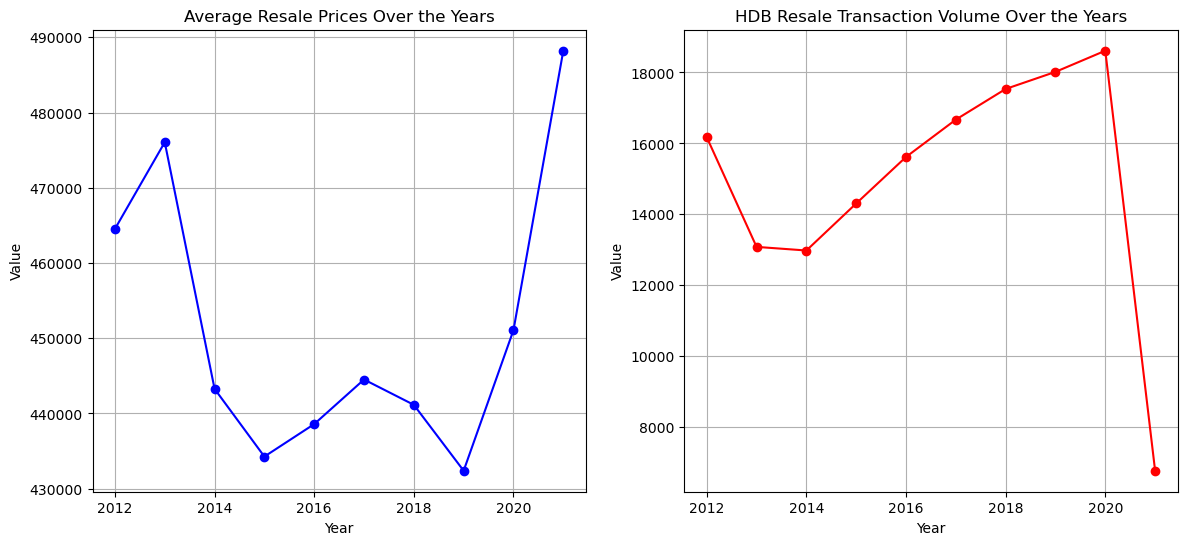

In [17]:
# Group the data by year and calculate the mean resale price for each year
yearly_prices = hdb.groupby(hdb['tranc_year'])['resale_price'].mean()
yearly_volume = hdb.groupby(hdb['tranc_year'])['resale_price'].count()

# Create a figure with two subplots (side by side)
plt.figure(figsize=(14, 6))

# First subplot for average resale price
plt.subplot(1, 2, 1)
yearly_prices.plot(kind='line', marker='o', color='b', linestyle='-', label='Average Resale Price')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Average Resale Prices Over the Years')
plt.grid(True)

# Second subplot for transaction volume
plt.subplot(1, 2, 2)
yearly_volume.plot(kind='line', marker='o', color='r', linestyle='-', label='Transaction Volume')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('HDB Resale Transaction Volume Over the Years')
plt.grid(True)

We can see a drop in average resale price from 2013 to 2015 and we can also see a drop in tranction volume, indicating that it might relate to low average resale price due to lesser transactions. From 2019 onwards we can see a rise in average resale price but drop in tranaction indicating likely prices are actually increasing and less affected by transaction volume

How much are location actually affecting the resale price?

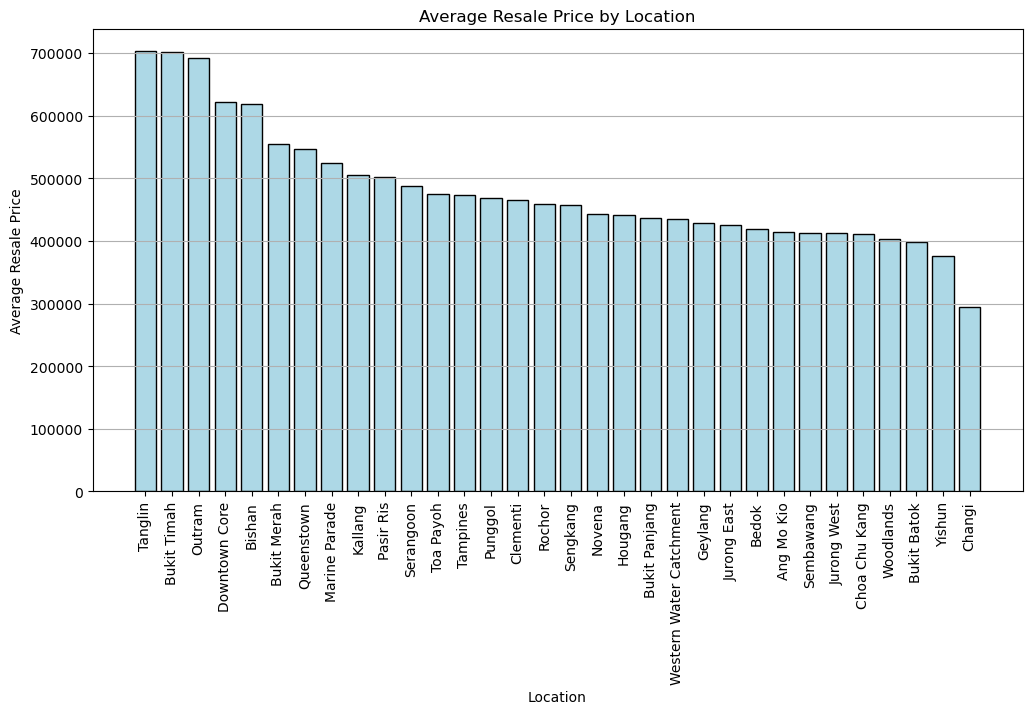

In [18]:
# Group the data by 'location' and calculate the mean resale price for each location
location_prices = hdb.groupby('planning_area')['resale_price'].mean()

# Sort the locations based on mean resale price in descending order
location_prices = location_prices.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(location_prices.index, location_prices.values, color='lightblue', edgecolor='black')
plt.xlabel('Location')
plt.ylabel('Average Resale Price')
plt.title('Average Resale Price by Location')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Show grid lines for the y-axis
plt.show()

We can see that location is also likely a factor in resale prices, as shown in the distribution & disparity of average resale price in different locations. From the top few location we can see average resale price hovering around 700,000 while in the lower locations hovering around 400,000, with changi even below 300,000 less than half the of tanglin. 

# Feature Selection

What are some features that have weak negative/positive correlation to resale price?

In [19]:
correlations = hdb.corr(numeric_only=True)['resale_price'].sort_values(ascending=True)
filtered_features = correlations[(correlations > -0.1) & (correlations < 0.1)]
filtered_features

mall_nearest_distance       -0.087105
3room_rental                -0.080060
2room_rental                -0.077613
1room_sold                  -0.039488
1room_rental                -0.037992
hawker_food_stalls          -0.032908
tranc_year                  -0.024638
vacancy                     -0.017100
hawker_nearest_distance     -0.016081
pri_sch_nearest_distance    -0.010868
hawker_market_stalls        -0.008538
tranc_month                 -0.005701
affiliation                 -0.000644
bus_interchange              0.003272
hawker_within_500m           0.013041
other_room_rental            0.013143
bus_stop_nearest_distance    0.030552
pri_sch_affiliation          0.031331
cutoff_point                 0.036094
multigen_sold                0.037609
studio_apartment_sold        0.041590
mrt_interchange              0.065785
mall_within_1km              0.083845
mall_within_500m             0.087893
4room_sold                   0.088686
hawker_within_1km            0.090740
sec_sch_near

Here we filtered features with a generous threshold of between 0.1 & -0.1 as they are accepted to be highly uncorrelated to resale price. Therefore, we will also be dropping those features

In [20]:
hdb.drop(filtered_features.index, axis=1, inplace=True)

Since we found out that features like pri_sch_nearest_distance are accepted to be highly uncorrelated to resale price and dropped, there will be no value in also keeping the names of school. This will be applied to other features relating to the ones that were dropped.

As pri_sch_nearest_distance & sec_sch_nearest_dist was dropped due to it being highly uncorrelated, pri_sch_name & sec_sch_name will also be dropped.

In [21]:
hdb.drop(['pri_sch_name', 'sec_sch_name'], axis=1, inplace=True)

As we found out previously, the school distance have weak correlation to resale price. By that logic, having the longitude and latitude of the schools will also be logically redundant. And will be dropped.

In [22]:
columns_to_drop = ['pri_sch_latitude', 'pri_sch_longitude', 'sec_sch_latitude', 'sec_sch_longitude']
hdb.drop(columns_to_drop, axis=1, inplace=True)

Since 'tranc_year' & 'tranc_month' exists, 'tranc_yearmonth' is redundant, thus is dropped

In [23]:
hdb.drop('tranc_yearmonth', axis=1, inplace=True)

Checking if flat_type column is consistent with full_flat_type

In [24]:
hdb[['flat_type', 'full_flat_type', 'flat_model']]

,flat_type,full_flat_type,flat_model
0,4 ROOM,4 ROOM Model A,Model A
1,5 ROOM,5 ROOM Improved,Improved
2,EXECUTIVE,EXECUTIVE Apartment,Apartment
3,4 ROOM,4 ROOM Model A,Model A
4,4 ROOM,4 ROOM Simplified,Simplified
...,...,...,...
150629,EXECUTIVE,EXECUTIVE Apartment,Apartment
150630,5 ROOM,5 ROOM Improved,Improved
150631,EXECUTIVE,EXECUTIVE Apartment,Apartment
150632,3 ROOM,3 ROOM Improved,Improved


As we can observe, full flat type is a combination of flat type and flat model, making separating columns unnecessary

In [25]:
hdb.drop(['flat_type', 'flat_model'], axis=1, inplace=True)

Checking if storey_range column is consistent with 'mid_storey', 'lower', 'upper', 'mid'

In [26]:
hdb[['storey_range','mid_storey', 'lower', 'upper', 'mid']]

,storey_range,mid_storey,lower,upper,mid
0,10 TO 12,11,10,12,11
1,07 TO 09,8,7,9,8
2,13 TO 15,14,13,15,14
3,01 TO 05,3,1,5,3
4,01 TO 03,2,1,3,2
...,...,...,...,...,...
150629,04 TO 06,5,4,6,5
150630,04 TO 06,5,4,6,5
150631,10 TO 12,11,10,12,11
150632,07 TO 09,8,7,9,8


Checking if mid_storey is equal to mid

In [27]:
(hdb['mid_storey'] == hdb['mid']).value_counts()

True    149772
Name: count, dtype: int64

Since mid_storey & storey_range is represented by lower, upper & mid. It will be dropped

In [28]:
hdb.drop(['mid_storey', 'storey_range'], axis=1, inplace=True)

Checking for similarity between town and planning_area

In [29]:
hdb[['town', 'planning_area']]

,town,planning_area
0,KALLANG/WHAMPOA,Kallang
1,BISHAN,Bishan
2,BUKIT BATOK,Bukit Batok
3,BISHAN,Bishan
4,YISHUN,Yishun
...,...,...
150629,WOODLANDS,Woodlands
150630,JURONG WEST,Jurong West
150631,BEDOK,Bedok
150632,QUEENSTOWN,Queenstown


Strandardise to lowercase for comparison

In [30]:
hdb['town'] = hdb['town'].str.lower()
hdb['planning_area'] = hdb['planning_area'].str.lower()
hdb[['town', 'planning_area']]

,town,planning_area
0,kallang/whampoa,kallang
1,bishan,bishan
2,bukit batok,bukit batok
3,bishan,bishan
4,yishun,yishun
...,...,...
150629,woodlands,woodlands
150630,jurong west,jurong west
150631,bedok,bedok
150632,queenstown,queenstown


Checking how similar is town and planning_area

In [31]:
(hdb['town'] == hdb['planning_area']).value_counts()

True     144075
False      5697
Name: count, dtype: int64

Observing differences between town and planning_area

In [32]:
hdb[(hdb['town'] == hdb['planning_area']) == False][['town', 'planning_area']]

,town,planning_area
0,kallang/whampoa,kallang
32,kallang/whampoa,novena
35,kallang/whampoa,kallang
55,kallang/whampoa,kallang
88,central area,rochor
...,...,...
150507,kallang/whampoa,kallang
150510,kallang/whampoa,kallang
150511,kallang/whampoa,kallang
150524,central area,outram


As we can see, planning area is more precise than town. For example, town is 'kallang/whampoa' and 'central area' but planning area is kallang and rochor. Therefore, we will be dropping town

In [33]:
hdb.drop('town', axis = 1, inplace=True)

Comparing planning area and address to see how similar they are

As we can see planning area is just the general area of the address therefore is redundant and will be dropped 

In [34]:
hdb.drop('planning_area', axis = 1, inplace=True)

As residential column has only 1 unique value and will be dropped as it will not add value to the analysis or modelling

In [35]:
hdb['residential'].unique()

array(['Y'], dtype=object)

In [36]:
hdb.drop(columns=['residential'], inplace=True)

Observing differences between address, block and street name

In [37]:
hdb[['address','block', 'street_name']]

,address,block,street_name
0,"3B, UPP BOON KENG RD",3B,UPP BOON KENG RD
1,"153, BISHAN ST 13",153,BISHAN ST 13
2,"289B, BT BATOK ST 25",289B,BT BATOK ST 25
3,"232, BISHAN ST 22",232,BISHAN ST 22
4,"876, YISHUN ST 81",876,YISHUN ST 81
...,...,...,...
150629,"849, WOODLANDS ST 82",849,WOODLANDS ST 82
150630,"648D, JURONG WEST ST 61",648D,JURONG WEST ST 61
150631,"639, BEDOK RESERVOIR RD",639,BEDOK RESERVOIR RD
150632,"32, HOLLAND CL",32,HOLLAND CL


As we can see, address is block + street name so we will be dropping block and street name as separating columns is unnecessary

In [38]:
hdb.drop(['block', 'street_name'], axis=1, inplace=True)

Dropping floor area square feet as there is already another one in square meters which provides same value

In [39]:
hdb.drop(columns=['floor_area_sqft'], inplace=True)

Dropping id as it has no value to the analysis, its only use for identification

In [40]:
hdb.drop('id', axis = 1, inplace=True)

Binarize columns commercial, market_hawker, multistorey_carpark, precinct_pavilion from (Y/N) to (1/0)

In [41]:
columns_to_convert = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']
hdb[columns_to_convert] = hdb[columns_to_convert].replace({'Y': 1, 'N': 0})

Drop postal column as there are many other columns that show location such as, block, street name, planning area, longitude and latitude

In [42]:
hdb.drop(columns=['postal'], inplace=True)

What are the top 10 features correlating to resale price?

In [43]:
hdb.corr(numeric_only=True).abs()['resale_price'].sort_values(ascending=False).head(11)

resale_price           1.000000
floor_area_sqm         0.656793
max_floor_lvl          0.495536
3room_sold             0.411966
5room_sold             0.360814
upper                  0.352164
mid                    0.351807
year_completed         0.351799
lower                  0.351038
lease_commence_date    0.348431
hdb_age                0.348431
Name: resale_price, dtype: float64

Lets view it in a heatmap

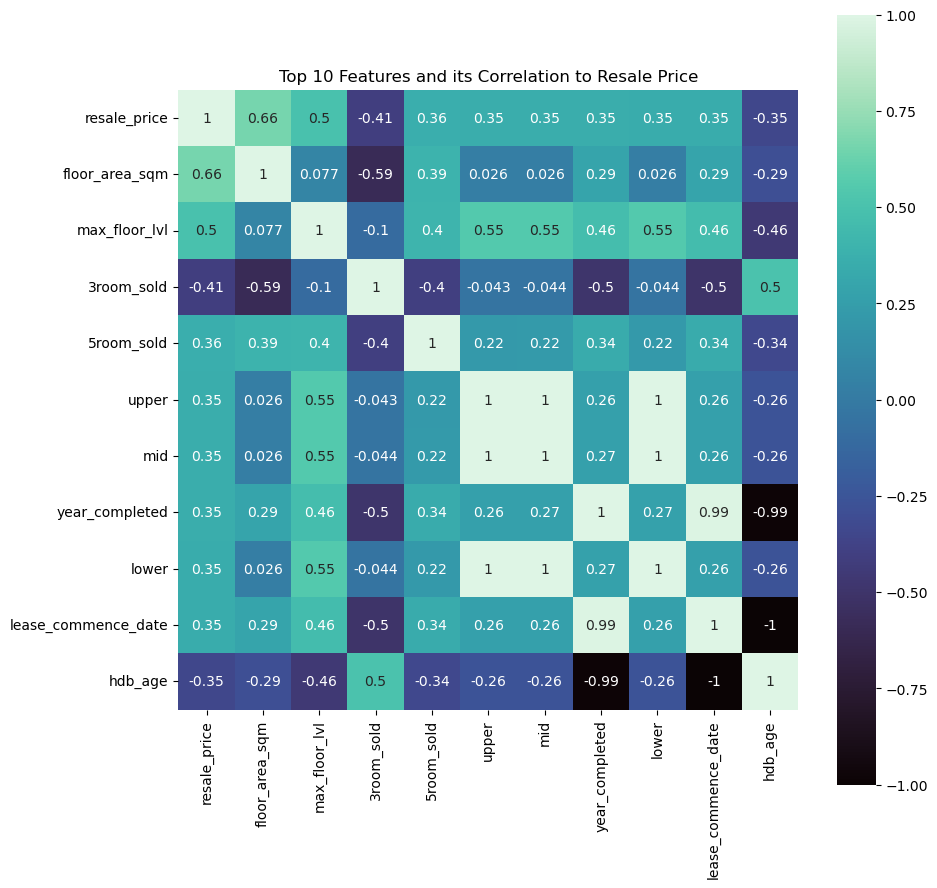

In [44]:
plt.figure(figsize=(10, 10))
sns.heatmap(hdb[hdb.corr(numeric_only=True).abs()['resale_price'].sort_values(ascending=False).head(11).index].corr(numeric_only=True), annot=True, cmap='mako', square=True)
plt.title('Top 10 Features and its Correlation to Resale Price');

Let focus down to resale price vs top 10 features

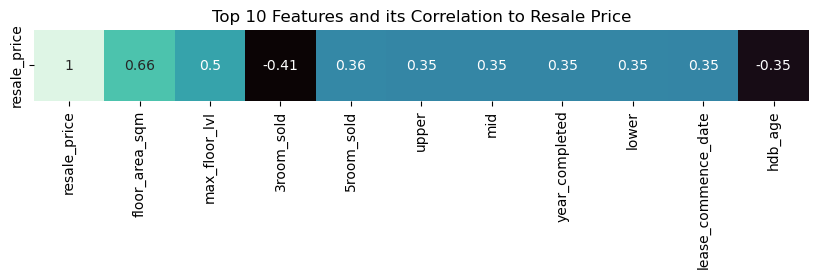

In [45]:
# Select the top 10 features with the highest absolute correlation with 'resale_price'
top_features = hdb.corr(numeric_only=True).abs()['resale_price'].sort_values(ascending=False).head(11).index

# Create a correlation matrix for the selected features
correlation_matrix = hdb[top_features].corr()

# Plot only the first row of the heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(correlation_matrix.iloc[:1, :], annot=True, cmap='mako', square=True, cbar=False)
plt.title('Top 10 Features and its Correlation to Resale Price')
plt.show()

From the correlation heatmap, flats from buildings with more 3 rooms units (-0.41) and higher hdb age (-0.35) likely contributes to lower resale price. Bigger floor area (0.66), flats with higher max floor level (0.5), buildings with more 3 rooms units (0.36) and the rest of the features with (0.35) are likely contributes higher resale price. 

Through this we can see the different variables affecting resale price. However, this are only highest and lowest correlation other factors still needs to be considered when looking at effects on resale price which will be dicussed later in the modelling process.

# Conclusion

Properties with larger floor areas, higher maximum floor levels, and more room units typically command higher resale prices due to their spaciousness, elevated positioning, and versatility, which are highly valued by prospective buyers.


Conversely, flats in buildings with a higher proportion of 3-room units and those with a longer HDB age tend to have lower resale prices. This could be attributed to perceptions of limited space and potential maintenance concerns associated with older propertie

However, it's important to note that this analysis exclusively focuses on factors influencing the resale prices of HDB apartments. For a more robust predictive model that accurately forecasts actual prices, further research and development are necessary. Such a model would be invaluable for real estate agents seeking to provide precise and informed recommendations to their clients in the future.s.